<a href="https://colab.research.google.com/github/makkyo-git/python-collection/blob/mabo/%E7%94%BB%E5%83%8F%E5%8A%A0%E5%B7%A5_ipynb_(%E6%BC%A2%E5%AD%97%E7%94%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip3 install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


① 画像の輝度値数を変え、角度を変えるコード↓

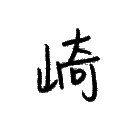

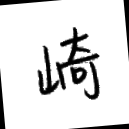

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# datasetは、自分が読み込ませたい画像のパスを書く
img=cv2.imread('/content/drive/MyDrive/dataset',0)
# γ変換の値(文字の濃さを変えるなら、この数値を変えてください)
gamma=0.1
# γ変換の対応表を作る対応表を作る
LUT_Table=np.zeros((256,1),dtype='uint8')
for i in range(len(LUT_Table)):
    LUT_Table[i][0]=255*(float(i)/255)**(1.0/gamma)

# γ変換をする
img_gamma=cv2.LUT(img,LUT_Table)

#画像の表示
cv2_imshow(img_gamma)

#加工した画像の書き込み
cv2.imwrite('/content/drive/MyDrive/dataset2', img_gamma)

# 文字の角度を変えたいなら、ここの数値を変えてください
angle = 5
h, w = img.shape[:2]
affine = cv2.getRotationMatrix2D((w/2.0, h/2.0), angle, 1.0)
img_gamma2 = cv2.warpAffine(img_gamma, affine, (w,h))

cv2_imshow(img_gamma2)
#再度、加工した画像を書き込み
cv2.imwrite('/content/drive/MyDrive/dataset2', img_gamma2)

② 画像の輝度値数を変え、線を細くするコード↓

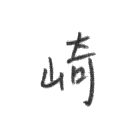

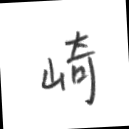

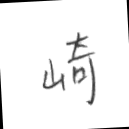

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# datasetは、自分が読み込ませたい画像のパスを書く
img=cv2.imread('/content/drive/MyDrive/dataset',0)
# γ変換の値(文字の濃さを変えるなら、この数値を変えてください)
gamma=0.5
# γ変換の対応表を作る対応表を作る
LUT_Table=np.zeros((256,1),dtype='uint8')
for i in range(len(LUT_Table)):
    LUT_Table[i][0]=255*(float(i)/255)**(1.0/gamma)

# γ変換をする
img_gamma=cv2.LUT(img,LUT_Table)

#画像の表示
cv2_imshow(img_gamma)

#加工した画像の書き込み
cv2.imwrite('/content/drive/MyDrive/dataset2', img_gamma)

# 文字の角度を変えたいなら、ここの数値を変えてください
angle = 3
h, w = img.shape[:2]
affine = cv2.getRotationMatrix2D((w/2.0, h/2.0), angle, 1.0)
img_gamma2 = cv2.warpAffine(img_gamma, affine, (w,h))

cv2_imshow(img_gamma2)
cv2.imwrite('/content/drive/MyDrive/dataset2', img_gamma2)

image = cv2.imread('/content/drive/MyDrive/dataset2', 0)
# 文字の細さを変えるなら、ここの数値を変えてください
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(image,kernel,iterations = 1)

cv2_imshow(dilation)
# 再度、加工した画像を書き込み
cv2.imwrite('/content/drive/MyDrive/dataset2', dilation)

②-2. 画像の輝度値数を変え、線を細くするコード②↓

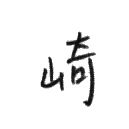

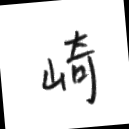

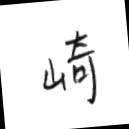

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# datasetは、自分が読み込ませたい画像のパスを書く
img=cv2.imread('/content/drive/MyDrive/dataset',0)
# γ変換の値(文字の濃さを変えるなら、この数値を変えてください)
gamma=0.3
# γ変換の対応表を作る対応表を作る
LUT_Table=np.zeros((256,1),dtype='uint8')
for i in range(len(LUT_Table)):
    LUT_Table[i][0]=255*(float(i)/255)**(1.0/gamma)

# γ変換をする
img_gamma=cv2.LUT(img,LUT_Table)

#画像の表示
cv2_imshow(img_gamma)

#加工した画像の書き込み
cv2.imwrite('/content/drive/MyDrive/dataset2', img_gamma)

# 文字の角度を変えたいなら、ここの数値を変えてください
angle = 5
h, w = img.shape[:2]
affine = cv2.getRotationMatrix2D((w/2.0, h/2.0), angle, 1.0)
img_gamma2 = cv2.warpAffine(img_gamma, affine, (w,h))

cv2_imshow(img_gamma2)
cv2.imwrite('/content/drive/MyDrive/dataset2', img_gamma2)

image = cv2.imread('/content/drive/MyDrive/dataset2', 0)
# 文字の細さを変えるなら、ここの数値を変えてください
kernel = np.ones((1,2),np.uint8)
dilation = cv2.dilate(image,kernel,iterations = 1)

cv2_imshow(dilation)
# 再度、加工した画像を書き込み
cv2.imwrite('/content/drive/MyDrive/dataset2', dilation)

③ ノイズを消すためのコード

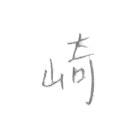

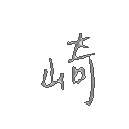

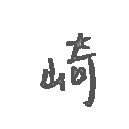

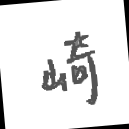

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# datasetは、自分が読み込ませたい画像のパスを書く
image = cv2.imread('/content/drive/MyDrive/dataset',0)
# 文字の細さを変えるなら、ここの数値を変えてください
kernel = np.ones((3,2),np.uint8)
dilation = cv2.dilate(image,kernel,iterations = 1)

cv2_imshow(dilation)

dilation = 255 - dilation

contours, hierarchy = cv2.findContours(dilation, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
output_image = cv2.cvtColor(dilation, cv2.COLOR_GRAY2BGR)
# thicknessの値を変えると、輪郭の線の太さを変えることができます
output_image = cv2.drawContours(output_image, contours, contourIdx=-1, color=(171,171,171),thickness=1)
output_image = 255 - output_image

# 加工した画像の書き込み
cv2.imwrite('/content/drive/MyDrive/dataset2', output_image)
cv2_imshow(output_image)

image2 = cv2.imread('/content/drive/MyDrive/dataset2',0)
# 文字の太さを変えるなら、ここの数値を変えてください
change = np.ones((2,3),np.uint8)
erosion = cv2.erode(image2,change,iterations=1)
cv2_imshow(erosion)

erosion = 255 - erosion

contours, hierarchy = cv2.findContours(dilation, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
output_image2 = cv2.cvtColor(erosion, cv2.COLOR_GRAY2BGR)
output_image2 = cv2.drawContours(output_image2, contours, contourIdx=-1, color=(171,171,171),thickness=1)
output_image2 = 255 - output_image2


# 文字の角度を変えたいなら、ここの数値を変えてください
angle = 5
h, w = image.shape[:2]
affine = cv2.getRotationMatrix2D((w/2.0, h/2.0), angle, 1.0)
erosion2 = cv2.warpAffine(output_image2, affine, (w,h))

cv2_imshow(erosion2)
#再度、加工した画像を書き込み
cv2.imwrite('/content/drive/MyDrive/dataset2', erosion2)

In [ ]:
# datasetの数を知るためのコード
import torchvision.datasets as dset

dataroot = '/content/drive/MyDrive/dataset'
dataset = dset.ImageFolder(root=dataroot)

len(dataset)

5607